In [242]:
using Compose
using Colors
using LinearAlgebra

set_default_graphic_size(15cm, 15cm)

In [243]:
# Compute the intersection of the line (P1:P2) with (P3:P4)
function xy(P1,P2,P3,P4)
    s=(P1[2]*(P2[1] - P3[1]) + P2[2]*P3[1] - P2[1]*P3[2] + P1[1]*(P3[2] - P2[2]))/
    (P2[2]*(P3[1] - P4[1]) + P1[2]*(P4[1] - P3[1]) + (P1[1] - P2[1])*(P3[2] - P4[2]))
    return ( P3[1] + s*(P4[1] - P3[1]), P3[2] + s*(P4[2] - P3[2]) )
end

# From a, b on [0,1] compute P1, P2, P3 and P4
cc(a, b, va, vb, vc) = 
    xy( vb .+ a .* (va .- vb), vc .+ a .* (va .- vc), va .+ b.*( vb .- va), vc .+ b .* ( vb .- vc) )

n, f=100, 0.6
data = [ [ rand(), f*rand(), f^2*rand(), f^3*rand(), f^4*rand(), f^4*rand() ] for _ in 1:n ]
#data = [ [ 0.6, 0.25, 0.10, 0.03, 0.015, 0.005 ] for _ in 1:10]
data ./= sum.(data)

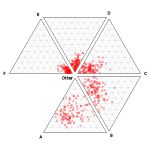

In [263]:
function ternary(ctx, data, cola, colb, v1, labels = Any[ ],  L=1.0, θ = -π/2)
    v3 = ( v1[1]+L*cos(θ-π/6), v1[2]-L*sin(θ-π/6) )
    v2 = ( v1[1]+L*cos(θ+π/6), v1[2]-L*sin(θ+π/6) )
    # 0.1 increment lines
    vx = [  [ v1 .+ f.*(v2 .- v1), v1 .+ f.*(v3 .- v1) ] for f in 0.1:0.1:0.91 ]
    append!(vx, [ [ v2 .+ f.*(v3 .- v2), v2 .+ f.*(v1 .- v2) ] for f in 0.1:0.1:0.91 ])
    append!(vx, [ [ v3 .+ f.*(v1 .- v3), v3 .+ f.*(v2 .- v3) ] for f in 0.1:0.1:0.91 ])
    # Data points
    pts = [ cc(data[i][cola], data[i][colb], v3, v2, v1) for i in eachindex(data) ]
    pa, pb = [ pts[i][1] for i in eachindex(pts)], [ pts[i][2] for i in eachindex(pts)]
    # Corner labels
    xl, yl, ll = Float64[], Float64[], String[]
    ff = 1.08
    if (length(labels)>=1) && (!ismissing(labels[1]))
        push!(xl, v1[1]+ff*L*cos(θ-π/6))
        push!(yl, v1[2]-ff*L*sin(θ-π/6))
        push!(ll, labels[1])
    end
    if (length(labels)>=2) && (!ismissing(labels[2]))
        push!(xl, v1[1]+ff*L*cos(θ+π/6))
        push!(yl, v1[2]-ff*L*sin(θ+π/6))
        push!(ll, labels[2])
    end
    if (length(labels)>=3) && (!ismissing(labels[3]))
        push!(xl, v1[1]-0.05)
        push!(yl, v1[2])
        push!(ll, labels[3])
    end
    return ( ctx, polygon([v1, v2, v3]), stroke("black"), fill("transparent"), 
            ( ctx, line(vx), stroke("light gray") ,
            ( ctx, circle(pa, pb, [0.005]), stroke("red"), clip([v1,v2,v3]) ),
            ( ctx, text(xl, yl, ll, [hcenter], [vcenter]), stroke("black") ) ),
    )
end

v(v0, θ, off=0.02)=(v0[1] + off*cos(θ), v0[2]-off*sin(θ))

compose(context(),
    ternary(context(), data, 1, 2, v(( 0.5, 0.5 ),-π/2+π/3*0), ["A",missing,"Other" ], 0.42, -π/2+π/3*0)...,
    ternary(context(), data, 2, 3, v(( 0.5, 0.5 ),-π/2+π/3*1), ["B"], 0.42, -π/2+π/3*1)...,
    ternary(context(), data, 3, 4, v(( 0.5, 0.5 ),-π/2+π/3*2), ["C"], 0.42, -π/2+π/3*2)...,
    ternary(context(), data, 4, 5, v(( 0.5, 0.5 ),-π/2+π/3*3), ["D"], 0.42, -π/2+π/3*3)...,
    ternary(context(), data, 5, 6, v(( 0.5, 0.5 ),-π/2+π/3*4), ["E", "F" ], 0.42, -π/2+π/3*4)...
)

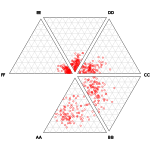

In [264]:
function ternary(ctx, data, cola, colb, v1, L, θ)
    v3 = ( v1[1]+L*cos(θ-π/6), v1[2]-L*sin(θ-π/6) )
    v2 = ( v1[1]+L*cos(θ+π/6), v1[2]-L*sin(θ+π/6) )
    # 0.1 increment lines
    vx = [  [ v1 .+ f.*(v2 .- v1), v1 .+ f.*(v3 .- v1) ] for f in 0.1:0.1:0.91 ]
    append!(vx, [ [ v2 .+ f.*(v3 .- v2), v2 .+ f.*(v1 .- v2) ] for f in 0.1:0.1:0.91 ])
    append!(vx, [ [ v3 .+ f.*(v1 .- v3), v3 .+ f.*(v2 .- v3) ] for f in 0.1:0.1:0.91 ])
    # Data points
    pts = [ cc(data[i][cola], data[i][colb], v3, v2, v1) for i in eachindex(data) ]
    pa, pb = [ pts[i][1] for i in eachindex(pts)], [ pts[i][2] for i in eachindex(pts)]
    return ( ctx, polygon([v1, v2, v3]), stroke("black"), fill("transparent"), 
            ( ctx, line(vx), stroke("light gray") ,
            ( ctx, circle(pa, pb, [0.005]), stroke("red"), clip([v1,v2,v3]) ),
    ))
end

v(v0, θ, off=0.02)=(v0[1] + off*cos(θ), v0[2]-off*sin(θ))

function label(ctx, v0, labels, L)
    xl, yl, ll = Float64[], Float64[], String[]
    for i in eachindex(labels)
        θ = -π+π*i/3
        vv = v(v0, θ, L)
        push!(xl, vv[1])
        push!(yl, vv[2])
        push!(ll, labels[i])
    end
    return (ctx, text(xl, yl, ll, [hcenter], [vcenter]), stroke("black") )
end

center = (0.5, 0.5)
compose(context(),
    ternary(context(), data, 1, 2, v(center,-π/2+π/3*0), 0.42, -π/2+π/3*0),
    ternary(context(), data, 2, 3, v(center,-π/2+π/3*1), 0.42, -π/2+π/3*1),
    ternary(context(), data, 3, 4, v(center,-π/2+π/3*2), 0.42, -π/2+π/3*2),
    ternary(context(), data, 4, 5, v(center,-π/2+π/3*3), 0.42, -π/2+π/3*3),
    ternary(context(), data, 5, 6, v(center,-π/2+π/3*4), 0.42, -π/2+π/3*4),
    label(context(),center, [ "AA", "BB", "CC", "DD", "EE", "FF" ], 0.48)
)